<a href="https://colab.research.google.com/github/Rashmithachalla/Bigdata/blob/main/DATA603_PYSPARK_MONGODB_10K_IPYNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import csv
from textwrap import wrap
from datetime import datetime

!pip3 install pyspark
!pip3 install pymongo

!apt install mongodb
!service mongodb start

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 43 kB/s 
     |████████████████████████████████| 199 kB 61.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=6f981c6e6bafaad7d39e47b7360dbbcd47ae76cdf07a019c15f183453ca2ad3d
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libpcap0.8 libstemmer0d libyaml-cpp0.5v5 mongo-tools mongodb-clients
  mongodb-server mongodb-server-core


### The below cells helps to download our entire dataset into the files once the run time is cleared it will be deleted automatically which helps in managing the storage efficeietly.

### It takes approtaimaxtely 25 mintues to download the entire data set.

In [ ]:
!wget https://data.iowa.gov/api/views/m3tr-qhgy/rows.csv?accessType=DOWNLOAD
# Once downloaded rename the file to rows.csv and then run the next cells

--2022-12-13 12:05:11--  https://data.iowa.gov/api/views/m3tr-qhgy/rows.csv?accessType=DOWNLOAD
Resolving data.iowa.gov (data.iowa.gov)... 52.206.140.205, 52.206.68.26, 52.206.140.199
Connecting to data.iowa.gov (data.iowa.gov)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [          <=>       ]   5.72G  4.47MB/s    in 22m 54s 

2022-12-13 12:28:06 (4.26 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [6139444182]



### Once the file is downloaded we are renaming it to rows.csv as the naming convention is not great for the file downloaded and using it forward.

### we can acheive this using shutil library, intially we have forgot to update the code for this file renaming in this file intially.

In [ ]:
source = '/content/rows.csv?accessType=DOWNLOAD'
target = '/content/rows.csv' 

shutil.copy(source,target)

'/content/rows.csv'

**Import csv file into MongoDB**

In [ ]:
from pymongo import MongoClient

try:
	myclient = MongoClient("mongodb://localhost:27017/")
	print("Connected successfully!!!")
except:
	print("Could not connect to MongoDB")

db = myclient.local
db.liquor_data.drop()
mycollection = db["liquor_data"]

header = ['Invoice/Item Number'
          ,'Date' 	
          ,'Store Number' 	
          ,'Store Name'
          ,'Address' 	
          ,'City'
          ,'Zip Code' 	
          ,'Store Location'
          ,'County Number' 	
          ,'County' 	
          ,'Category' 	
          ,'Category Name' 	
          ,'Vendor Number' 	
          ,'Vendor Name' 	
          ,'Item Number' 	
          ,'Item Description' 	
          ,'Pack'
          ,'Bottle Volume (ml)' 	
          ,'State Bottle Cost'	
          ,'State Bottle Retail' 	
          ,'Bottles Sold' 	
          ,'Sale (Dollars)' 	
          ,'Volume Sold (Liters)' 	
          ,'Volume Sold (Gallons)']

csvfile = open('rows.csv', 'r')
reader = csv.DictReader( csvfile )

i = 1
for each in reader:
    if (i<=10000):
      row={}
      for field in header:
          if field!='County Number':
            row[field]=each[field]
        
      # print(row)
      mycollection.insert_one(row)
      i += 1
    
    else:
      break

Connected successfully!!!


In [ ]:
# Establish mongoDB connection
try:
	myclient = MongoClient("mongodb://localhost:27017/")
	print("Connected successfully!!!")
except:
	print("Could not connect to MongoDB")

db = myclient.local
mycollection = db["liquor_data"]

# Reading data
liquor_data_df = []
with myclient:
    collection = mycollection.find()
    for record in collection:
        x = list(record.values())
        if('' not in x):
            date_obj = datetime.strptime(x[2], '%m/%d/%Y')
            liquor_data_df.append([x[1], date_obj.strftime("%Y-%m-%d"), int(x[3]), x[4], x[5], x[6], x[7], x[8], x[9], int(x[10]), x[11], int(x[12]),
                         x[13], int(x[14]), x[15], int(x[16]), int(x[17]), float(x[18]), float(x[19]), int(x[20]), float(x[21]), float(x[22]), float(x[23])])

print(liquor_data_df[0:10])
print(len(liquor_data_df))

Connected successfully!!!
[['S19207200056', '2014-05-28', 3495, 'GREAT PASTIMES', '228 N MAIN ST', 'MONTICELLO', '52310', 'POINT (-91.183413 42.24013200000001)', 'JONES', 1081300, 'PEPPERMINT SCHNAPPS', 434, 'LUXCO-ST LOUIS', 81208, 'PARAMOUNT PEPPERMINT SCHNAPPS', 6, 1750, 7.08, 10.62, 2, 21.24, 3.5, 0.92], ['S04239800008', '2012-02-23', 4140, 'FAREWAY STORES #900 / EUCLID', '100 EUCLID AVE', 'DES MOINES', '50313', 'POINT (-93.618724 41.627684)', 'POLK', 1012200, 'SCOTCH WHISKIES', 55, 'SAZERAC NORTH AMERICA', 8826, "LAUDER'S SCOTCH", 12, 750, 5.1, 7.65, 12, 91.8, 9.0, 2.38], ['S18869000008', '2014-05-08', 4598, 'QUIK TRIP #501 / E EUCLID DM', '2221 E EUCLID AVE', 'DES MOINES', '50317', 'POINT (-93.577655 41.627702000000006)', 'POLK', 1031080, 'VODKA 80 PROOF', 300, 'MCCORMICK DISTILLING COMPANY', 36904, 'MCCORMICK VODKA PET', 24, 375, 1.8, 2.69, 12, 32.28, 4.5, 1.19], ['S08379900008', '2012-10-16', 2573, 'HY-VEE FOOD STORE / MUSCATINE', '2400 2ND AVE', 'MUSCATINE', '52761', 'POINT (-

**Setting Up PySpark**

In [ ]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
import pyspark.ml.feature
from pyspark.sql import SparkSession
from pyspark.ml.feature import OneHotEncoder
from pyspark.sql.functions import col, dayofmonth, hour, month, year, mean, sum, count, col

spark = SparkSession.builder.appName('liquor_data').getOrCreate()

header.pop(8)

liquor_data = spark.createDataFrame(liquor_data_df, header)
liquor_data = liquor_data.drop('Invoice/Item Number'
                              ,'Address'
                              ,'Store Number' 	
                              ,'Category' 	
                              ,'Vendor Number' 	
                              ,'Item Number' 	
                              ,'Store Location')

In [ ]:
liquor_data.columns

['Date',
 'Store Name',
 'City',
 'Zip Code',
 'County',
 'Category Name',
 'Vendor Name',
 'Item Description',
 'Pack',
 'Bottle Volume (ml)',
 'State Bottle Cost',
 'State Bottle Retail',
 'Bottles Sold',
 'Sale (Dollars)',
 'Volume Sold (Liters)',
 'Volume Sold (Gallons)']

**Analysis**

Distribution of Columns

In [ ]:
liquor_data.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Date,9094,None,None,2012-01-03,2015-11-30
Store Name,9094,None,None,218 FUEL EXPRESS & CHUBBY'S LIQUOR,ZAPF'S PRONTO MARKET
City,9094,None,None,ACKLEY,ZWINGLE
Zip Code,9094,51319.52475247525,993.4122903094518,50002,712-2
County,9094,None,None,ADAIR,WRIGHT
Category Name,9094,None,None,100 PROOF VODKA,WHITE CREME DE MENTHE
Vendor Name,9094,None,None,AIKO IMPORTERS INC,"YAHARA BAY DISTILLERS, INC"
Item Description,9094,None,None,1800 REPOSADO TEQUILA,YUKON JACK WICKED HOT
Pack,9094,12.177149769078513,7.28076404635179,1,48


**Setting Up Spark MLlib**

In [ ]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

**1. Best Alcohol Categories to Sell**

In [ ]:
# X: Pack, Bottles Sold, Sales (Dollars), Category

CategoryIndexer = StringIndexer(inputCol = 'Category Name', outputCol = 'Category_Index')
categories_df = CategoryIndexer.fit(liquor_data).transform(liquor_data)
category_index_dict = categories_df.select("Category Name", "Category_Index").distinct()
# category_index_dict.show()

# Loads data.
features = ['Pack', 'Bottles Sold', 'Sale (Dollars)', 'Category_Index']
assembler = VectorAssembler(inputCols=features,outputCol="features")
dataset = assembler.transform(categories_df)

# Trains a k-means model.
dataset = dataset.select('features')
kmeans = KMeans().setK(2).setSeed(2)
model = kmeans.fit(dataset)

# Make predictions
predictions = model.transform(dataset)
results = predictions.where(col("prediction").isin(["1"])).orderBy(['prediction'], ascending = [False]).collect()

# Display Best Categories
print("Best Categories are :- ")
categories_list = []
for result in results:
  category_index = result.features[3]
  categories_list.append(category_index_dict.where(col("Category_Index").isin(category_index)).collect()[0][0])

print(set(categories_list))

best_categories = pd.DataFrame(list(set(categories_list)))

# # Shows the result.
# centers = model.clusterCenters()
# print("Cluster Centers: ")
# for center in centers:
#     print(center)

Best Categories are :- 
{'TENNESSEE WHISKIES', 'CANADIAN WHISKIES', 'SPICED RUM'}


**3. Locations to set up new stores**

In [ ]:
# X: Pack, Bottles Sold, Sales (Dollars), Volume Sold (Litres), City

LocationIndexer = StringIndexer(inputCol = 'City', outputCol = 'Location_Index')
new_locations_df = LocationIndexer.fit(liquor_data).transform(liquor_data)
location_index_dict = new_locations_df.select("City", "Location_Index").distinct()
# location_index_dict.show()

# Loads data.
features = ['Pack', 'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)', 'Location_Index']
assembler = VectorAssembler(inputCols=features,outputCol="features")
dataset = assembler.transform(new_locations_df)

# Trains a k-means model.
dataset = dataset.select('features')
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(dataset)

# Make predictions
predictions = model.transform(dataset)
results = predictions.where(col("prediction").isin(["1"])).orderBy(['prediction'], ascending = [False]).collect()

# Display Best Cities
print("Best Cities are :- ")
cities_list = []
for result in results:
  city_index = result.features[4]
  cities_list.append(location_index_dict.where(col("Location_Index").isin(city_index)).collect()[0][0])

print(set(cities_list))

best_cities = pd.DataFrame(list(set(cities_list)))

# # Shows the result.
# centers = model.clusterCenters()
# print("Cluster Centers: ")
# for center in centers:
#     print(center)


Best Cities are :- 
{'CEDAR RAPIDS', 'DES MOINES', 'MILFORD'}


**4. Vendors to choose for better Profit and Sales**

In [ ]:
# X: Pack, Bottles Sold, Sales (Dollars), Volume Sold (Litres), Vendor Name

VendorIndexer = StringIndexer(inputCol = 'Vendor Name', outputCol = 'Vendor_Name_Index')
new_vendors_df = VendorIndexer.fit(liquor_data).transform(liquor_data)
vendor_index_dict = new_vendors_df.select("Vendor Name", "Vendor_Name_Index").distinct()
# vendor_index_dict.show() 

# Loads data.
features = ['Pack', 'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)', 'Vendor_Name_Index']
assembler = VectorAssembler(inputCols=features,outputCol="features")
new_vendors_df = assembler.transform(new_vendors_df)

# Trains a k-means model.
new_vendors_df = new_vendors_df.select('features')
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(new_vendors_df)

# Make predictions
predictions = model.transform(dataset)
results = predictions.where(col("prediction").isin(["1"])).orderBy(['prediction'], ascending = [False]).collect()

# Display Best Vendors
print("Best Vendors are :- ")
vendor_list = []
for result in results:
  vendor_index = result.features[4]
  vendor_name = vendor_index_dict.where(col("Vendor_Name_Index").isin(vendor_index)).collect()

  if(len(vendor_name) != 0):
    vendor_list.append(vendor_name[0][0])

print(set(vendor_list))

best_vendors = pd.DataFrame(list(set(vendor_list)))

# # Shows the result.
# centers = model.clusterCenters()
# print("Cluster Centers: ")
# for center in centers:
#     print(center)

Best Vendors are :- 
{'LUXCO-ST LOUIS', 'YAHARA BAY DISTILLERS, INC', 'DIAGEO AMERICAS'}


**2. Relationship b/w time and sales**

2.1 Year wise sales

   Time_Sales_Year  Total Bottles Sold  Total Sale in Dollars  \
3             2012               22870              302048.84   
1             2013               23289              310432.87   
2             2014               22382              292903.76   
0             2015               19382              263418.39   

   Total Volume Sold  
3           21496.92  
1           21819.20  
2           20685.80  
0           17310.14  


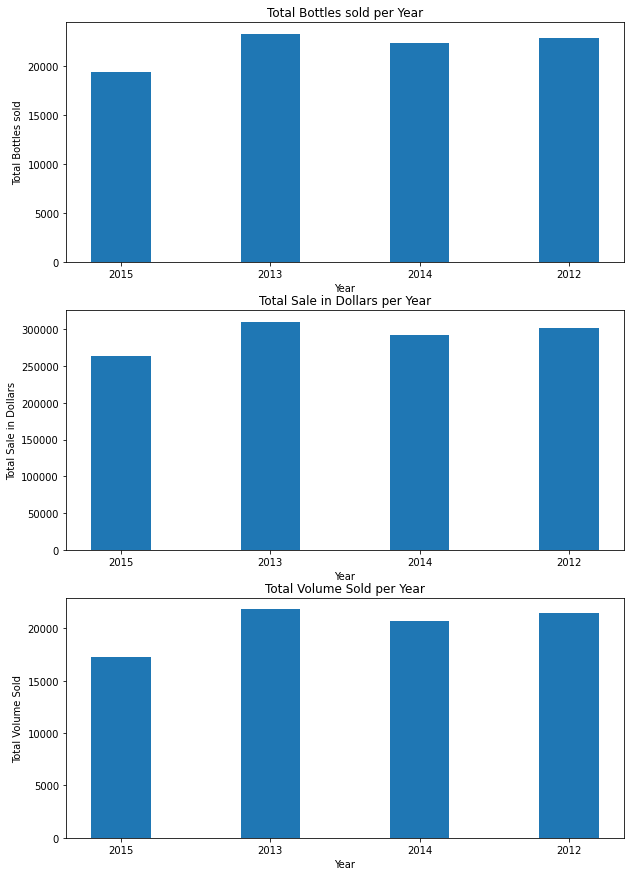

In [ ]:
fig = plt.figure(figsize = (10, 15))

year_wise_bottle_sold = liquor_data.groupBy(year("Date").alias("Year")).agg(mean("Bottles Sold").alias("Average Bottles sold"), 
                                                                            sum("Bottles Sold").alias("Total Bottles Sold")).toPandas()

# Graphs
ax1 = plt.subplot2grid((3,1), (0, 0))
plt.bar(year_wise_bottle_sold['Year'].astype(str), year_wise_bottle_sold['Total Bottles Sold'], width = 0.4)
plt.xlabel("Year")
plt.ylabel("Total Bottles sold")
plt.title("Total Bottles sold per Year")

year_wise_sales = liquor_data.groupBy(year("Date").alias("Year")).agg(mean("Sale (Dollars)").alias("Average Sale in Dollars"),
                                                                      sum("Sale (Dollars)").alias("Total Sale in Dollars")).toPandas()

# Graphs
ax1 = plt.subplot2grid((3,1),(1, 0))
plt.bar(year_wise_sales['Year'].astype(str), year_wise_sales['Total Sale in Dollars'], width = 0.4)
plt.xlabel("Year")
plt.ylabel("Total Sale in Dollars")
plt.title("Total Sale in Dollars per Year")

year_wise_volume_sold = liquor_data.groupBy(year("Date").alias("Year")).agg(mean("Volume Sold (Liters)").alias("Average Volume Sold"),
                                                                      sum("Volume Sold (Liters)").alias("Total Volume Sold")).toPandas()

# Graphs
ax1 = plt.subplot2grid((3,1), (2, 0))
plt.bar(year_wise_volume_sold['Year'].astype(str), year_wise_volume_sold['Total Volume Sold'], width = 0.4)
plt.xlabel("Year")
plt.ylabel("Total Volume Sold")
plt.title("Total Volume Sold per Year")


# Table for Tableau
tableau_year_table = liquor_data.groupBy(year("Date").alias("Time_Sales_Year")).agg(sum("Bottles Sold").alias("Total Bottles Sold"),
                                                                          sum("Sale (Dollars)").alias("Total Sale in Dollars"),
                                                                          sum("Volume Sold (Liters)").alias("Total Volume Sold")).toPandas()
tableau_year_table = tableau_year_table.sort_values(by=['Time_Sales_Year'])
print(tableau_year_table.head(100))

2.2 Month wise Sales

    Time_Sales_Month  Total Bottles Sold  Total Sale in Dollars  \
1                  1                5950               74702.63   
11                 2                5894               73526.70   
3                  3                7294              107167.97   
6                  4                8276              111177.84   
4                  5                7643               96332.63   
2                  6                7811              109511.41   
8                  7                7838               96732.37   
7                  8                7127               91062.92   
5                  9                6826               91954.23   
9                 10                9258              129652.54   
10                11                6755               96148.01   
0                 12                7251               90834.61   

    Total Volume Sold  
1             5337.94  
11            5150.12  
3             6656.31  
6             8090.60  
4       

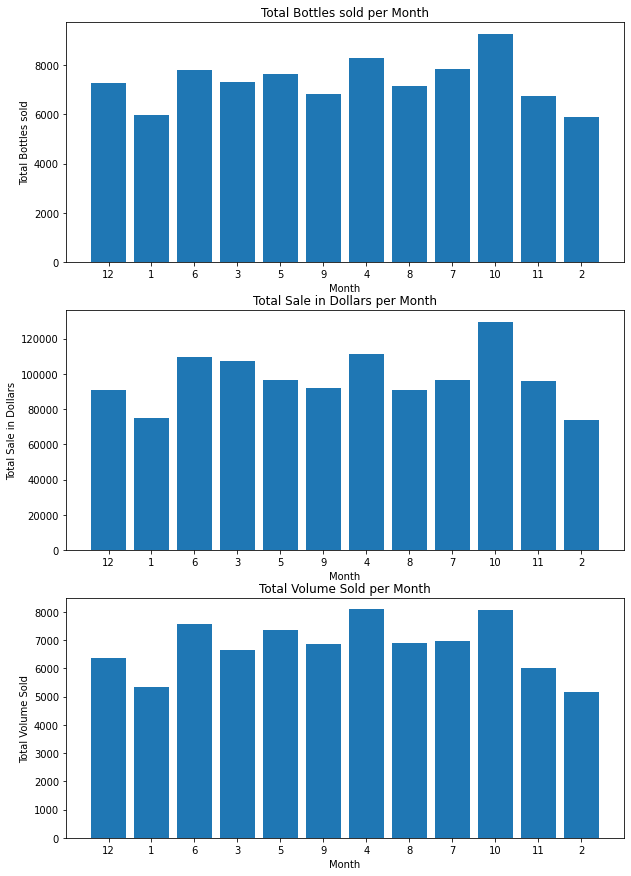

In [ ]:
fig = plt.figure(figsize = (10, 15))

month_wise_bottle_sold = liquor_data.groupBy(month("Date").alias("Month")).agg(mean("Bottles Sold").alias("Average Bottles sold"), 
                                                                            sum("Bottles Sold").alias("Total Bottles Sold")).toPandas()

# Graphs
ax1 = plt.subplot2grid((3,1), (0, 0))
plt.bar(month_wise_bottle_sold['Month'].astype(str), month_wise_bottle_sold['Total Bottles Sold'])
plt.xlabel("Month")
plt.ylabel("Total Bottles sold")
plt.title("Total Bottles sold per Month")



month_wise_sales = liquor_data.groupBy(month("Date").alias("Month")).agg(mean("Sale (Dollars)").alias("Average Sale in Dollars"),
                                                                      sum("Sale (Dollars)").alias("Total Sale in Dollars")).toPandas()

# Graphs
ax1 = plt.subplot2grid((3,1),(1, 0))
plt.bar(month_wise_sales['Month'].astype(str), month_wise_sales['Total Sale in Dollars'])
plt.xlabel("Month")
plt.ylabel("Total Sale in Dollars")
plt.title("Total Sale in Dollars per Month")


month_wise_volume_sold = liquor_data.groupBy(month("Date").alias("Month")).agg(mean("Volume Sold (Liters)").alias("Average Volume Sold"),
                                                                      sum("Volume Sold (Liters)").alias("Total Volume Sold")).toPandas()

# Graphs
ax1 = plt.subplot2grid((3,1), (2, 0))
plt.bar(month_wise_volume_sold['Month'].astype(str), month_wise_volume_sold['Total Volume Sold'])
plt.xlabel("Month")
plt.ylabel("Total Volume Sold")
plt.title("Total Volume Sold per Month")


# Table for Tableau
tableau_month_table = liquor_data.groupBy(month("Date").alias("Time_Sales_Month")).agg(sum("Bottles Sold").alias("Total Bottles Sold"),
                                                                          sum("Sale (Dollars)").alias("Total Sale in Dollars"),
                                                                          sum("Volume Sold (Liters)").alias("Total Volume Sold")).toPandas()

tableau_month_table = tableau_month_table.sort_values(by=['Time_Sales_Month'])
print(tableau_month_table.head(100))

2.3 Day of month wise sales

    Time_Sales_Day_of_Month  Total Bottles Sold  Total Sale in Dollars  \
6                         1                2209               29695.88   
28                        2                2743               36836.64   
10                        3                3220               47433.34   
17                        4                4108               51443.70   
12                        5                2770               39065.55   
9                         6                2986               40135.40   
20                        7                3460               52380.91   
18                        8                2658               33256.94   
15                        9                3018               40035.27   
21                       10                3271               37252.11   
26                       11                3015               41583.57   
4                        12                2744               31673.99   
7                        13           

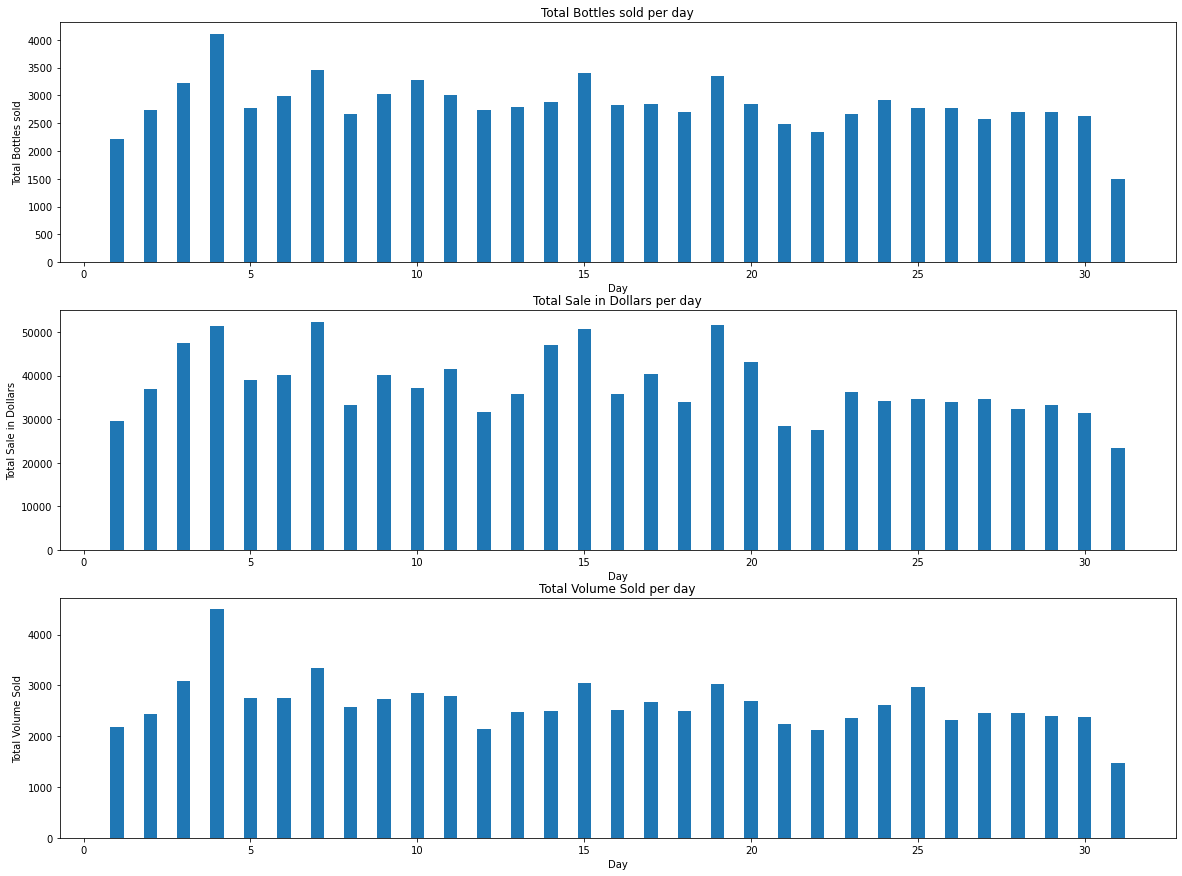

In [ ]:
fig = plt.figure(figsize = (20, 15))

day_wise_bottle_sold = liquor_data.groupBy(dayofmonth("Date").alias("Day")).agg(mean("Bottles Sold").alias("Average Bottles sold"), 
                                                                            sum("Bottles Sold").alias("Total Bottles Sold")).toPandas()

# Graphs
ax1 = plt.subplot2grid((3,1), (0, 0))
plt.bar(day_wise_bottle_sold['Day'].astype(int), day_wise_bottle_sold['Total Bottles Sold'], width = 0.4)
plt.xlabel("Day")
plt.ylabel("Total Bottles sold")
plt.title("Total Bottles sold per day")


day_wise_sales = liquor_data.groupBy(dayofmonth("Date").alias("Day")).agg(mean("Sale (Dollars)").alias("Average Sale in Dollars"),
                                                                      sum("Sale (Dollars)").alias("Total Sale in Dollars")).toPandas()

# Graphs
ax1 = plt.subplot2grid((3,1),(1, 0))
plt.bar(day_wise_sales['Day'].astype(int), day_wise_sales['Total Sale in Dollars'], width = 0.4)
plt.xlabel("Day")
plt.ylabel("Total Sale in Dollars")
plt.title("Total Sale in Dollars per day")


day_wise_volume_sold = liquor_data.groupBy(dayofmonth("Date").alias("Day")).agg(mean("Volume Sold (Liters)").alias("Average Volume Sold"),
                                                                      sum("Volume Sold (Liters)").alias("Total Volume Sold")).toPandas()

# Graphs
ax1 = plt.subplot2grid((3,1), (2, 0))
plt.bar(day_wise_volume_sold['Day'].astype(int), day_wise_volume_sold['Total Volume Sold'], width = 0.4)
plt.xlabel("Day")
plt.ylabel("Total Volume Sold")
plt.title("Total Volume Sold per day")


# Table for Tableau
tableau_dayofmonth_table = liquor_data.groupBy(dayofmonth("Date").alias("Time_Sales_Day_of_Month")).agg(sum("Bottles Sold").alias("Total Bottles Sold"),
                                                                          sum("Sale (Dollars)").alias("Total Sale in Dollars"),
                                                                          sum("Volume Sold (Liters)").alias("Total Volume Sold")).toPandas()
                                                                          
tableau_dayofmonth_table = tableau_dayofmonth_table.sort_values(by=['Time_Sales_Day_of_Month'])
print(tableau_dayofmonth_table.head(100))

**5. Comparing the sales of Pack and Bottle**

    Pack_Bottle_Month  Total Bottles Sold  Total Pack Sold
1                   1                5950             8499
11                  2                5894             8199
3                   3                7294             9752
6                   4                8276             9140
4                   5                7643             9626
2                   6                7811             9203
8                   7                7838            10224
7                   8                7127             9534
5                   9                6826             9236
9                  10                9258             9574
10                 11                6755             8841
0                  12                7251             8911


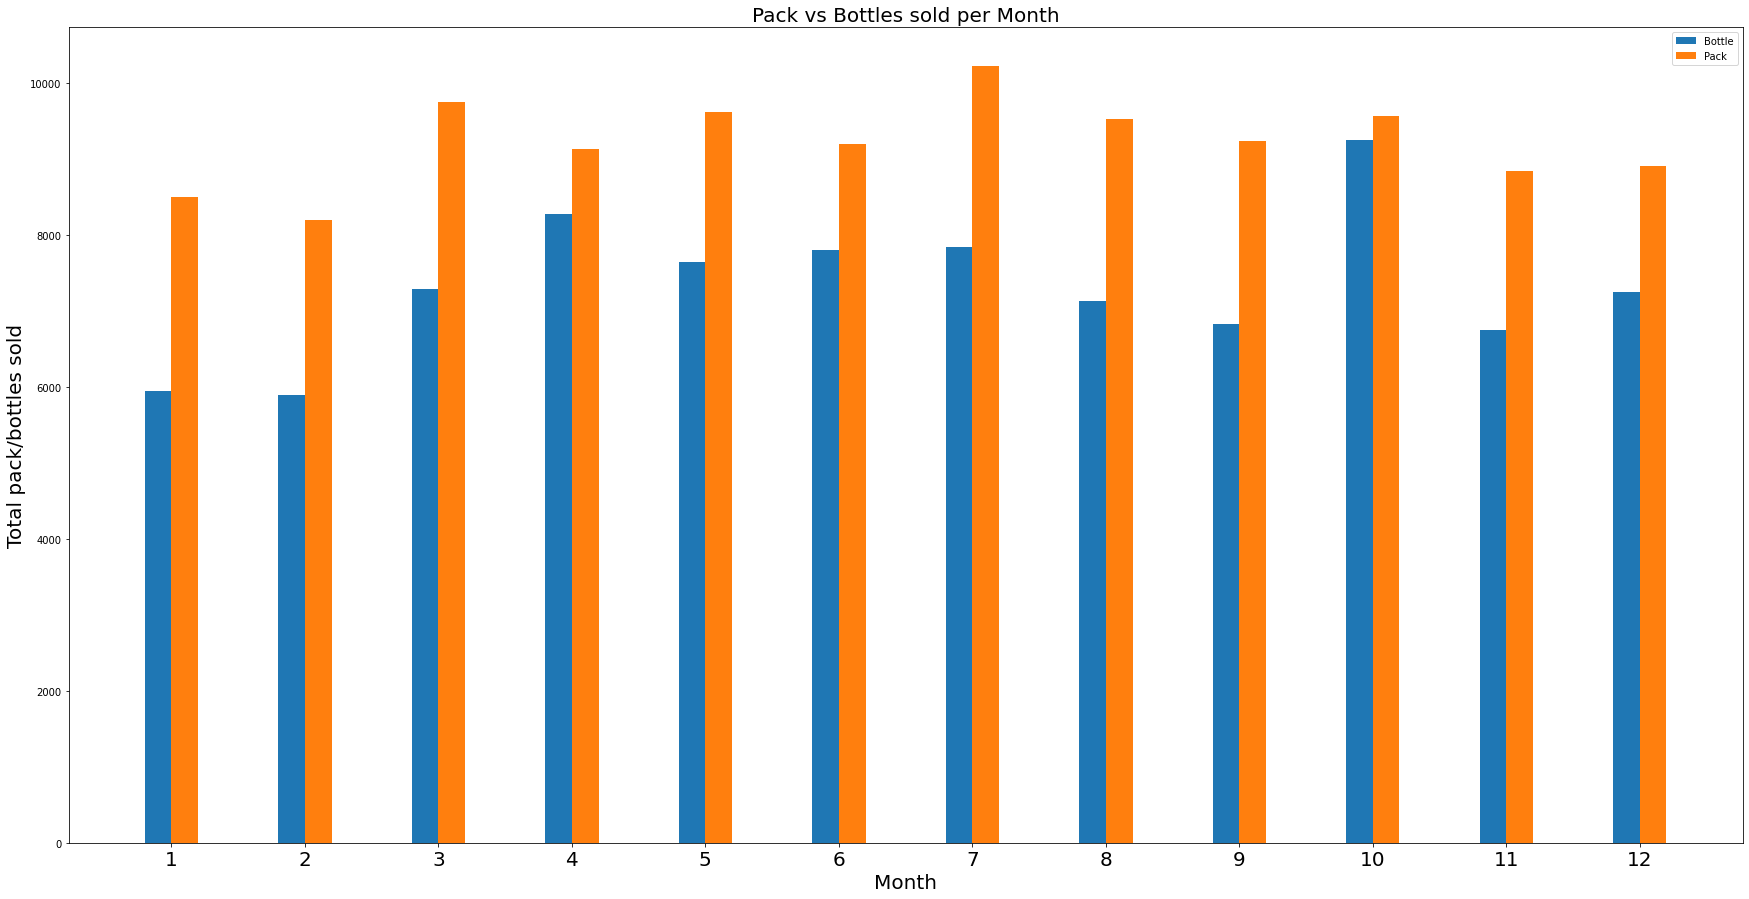

In [ ]:
fig = plt.figure(figsize = (30, 15))

month_wise_pack_bottle_sold = liquor_data.groupBy(month("Date").alias("Pack_Bottle_Month")).agg(mean("Bottles Sold").alias("Average Bottles sold"), 
                                                                            sum("Bottles Sold").alias("Total Bottles Sold"),
                                                                            mean("Pack").alias("Average Pack sold"), 
                                                                            sum("Pack").alias("Total Pack Sold")).toPandas()

# Graphs
plt.bar(month_wise_pack_bottle_sold['Pack_Bottle_Month'] - 0.1, month_wise_pack_bottle_sold['Total Bottles Sold'], width = 0.2, label='Bottle')
plt.bar(month_wise_pack_bottle_sold['Pack_Bottle_Month'] + 0.1, month_wise_pack_bottle_sold['Total Pack Sold'], width = 0.2, label='Pack')

x = list(set(month_wise_pack_bottle_sold['Pack_Bottle_Month'].values.tolist()))
plt.xticks(x, x, size = 20)
plt.xlabel("Month", size = 20)
plt.ylabel("Total pack/bottles sold", size = 20)
plt.legend(["Bottle", "Pack"])
plt.title("Pack vs Bottles sold per Month", size = 20)


# Tableau Table
month_wise_pack_bottle_sold = month_wise_pack_bottle_sold.drop(['Average Bottles sold', 'Average Pack sold'], axis=1).sort_values(by=['Pack_Bottle_Month'])
print(month_wise_pack_bottle_sold.head(100))

   Pack_Bottle_Year  Total Bottles Sold  Total Pack Sold
3              2012               22870            27914
1              2013               23289            28203
2              2014               22382            28456
0              2015               19382            26166


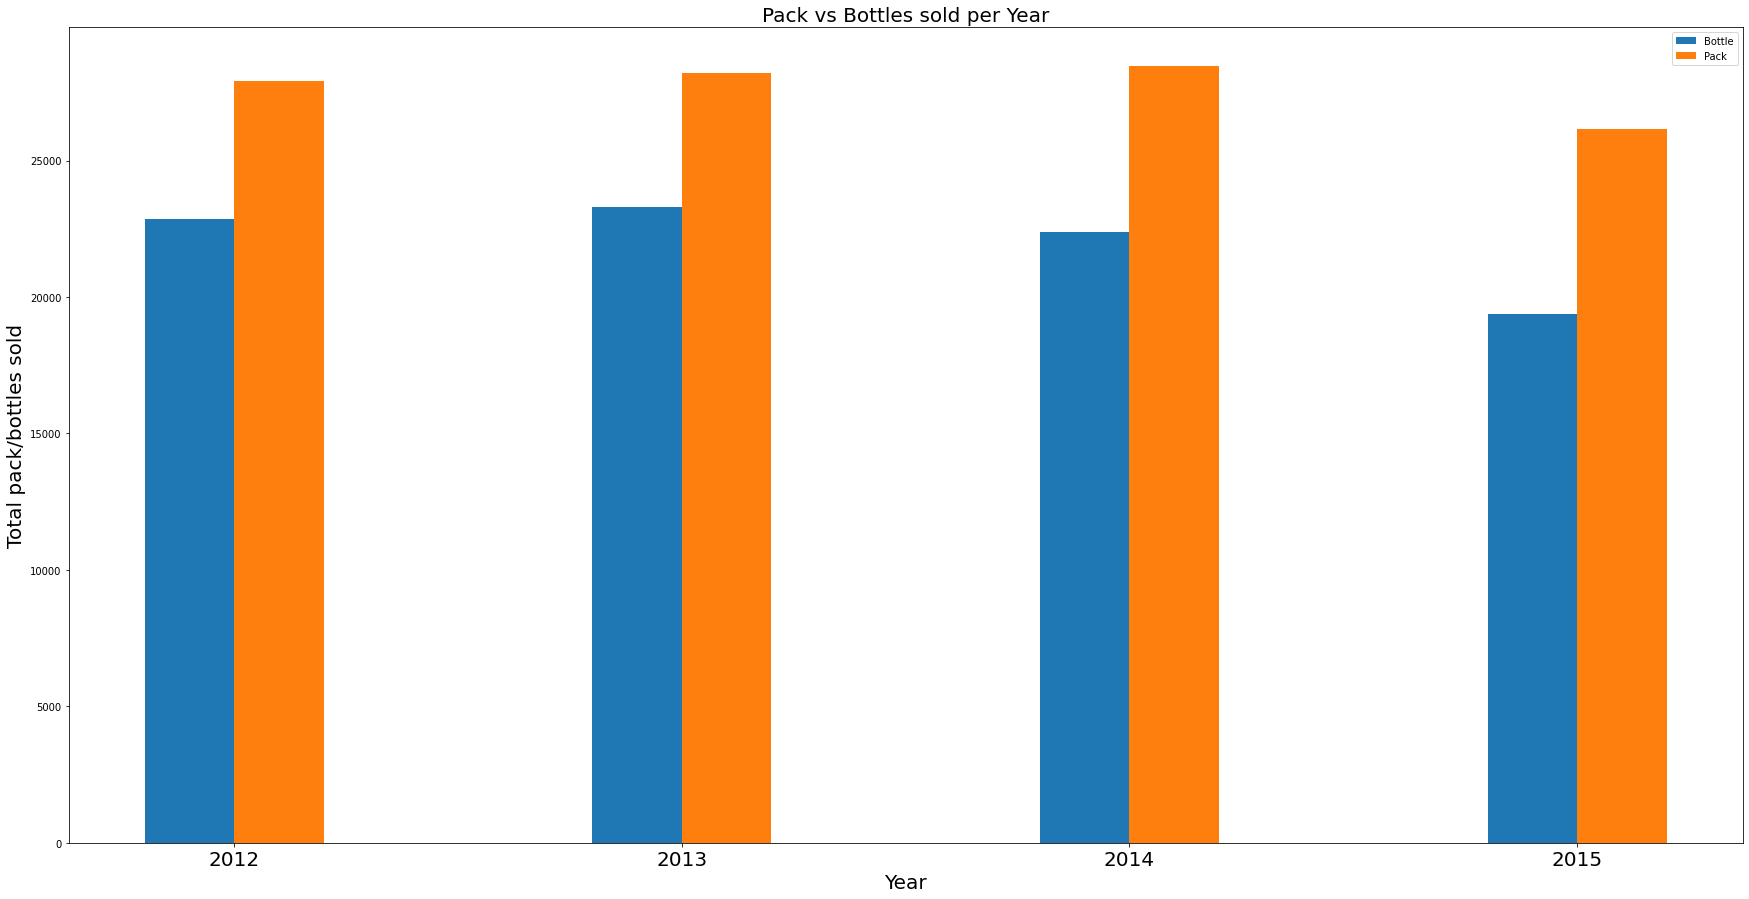

In [ ]:
fig = plt.figure(figsize = (30, 15))

year_wise_pack_bottle_sold = liquor_data.groupBy(year("Date").alias("Pack_Bottle_Year")).agg(mean("Bottles Sold").alias("Average Bottles sold"), 
                                                                            sum("Bottles Sold").alias("Total Bottles Sold"),
                                                                            mean("Pack").alias("Average Pack sold"), 
                                                                            sum("Pack").alias("Total Pack Sold")).toPandas()

# Graphs
plt.bar(year_wise_pack_bottle_sold['Pack_Bottle_Year'] - 0.1, year_wise_pack_bottle_sold['Total Bottles Sold'], width = 0.2, label='Bottle')
plt.bar(year_wise_pack_bottle_sold['Pack_Bottle_Year'] + 0.1, year_wise_pack_bottle_sold['Total Pack Sold'], width = 0.2, label='Pack')

x = list(set(year_wise_pack_bottle_sold['Pack_Bottle_Year'].values.tolist()))
plt.xticks(x, x, size = 20)
plt.xlabel("Year", size = 20)
plt.ylabel("Total pack/bottles sold", size = 20)
plt.legend(["Bottle", "Pack"])
plt.title("Pack vs Bottles sold per Year", size = 20)


# Tableau Table
year_wise_pack_bottle_sold = year_wise_pack_bottle_sold.drop(['Average Bottles sold', 'Average Pack sold'], axis=1).sort_values(by=['Pack_Bottle_Year'])
print(year_wise_pack_bottle_sold.head(100))

In [ ]:
# Merge all Dataframes
final_tableau_df = pd.concat([tableau_year_table, 
                 tableau_month_table, 
                 tableau_dayofmonth_table, 
                 month_wise_pack_bottle_sold, 
                 year_wise_pack_bottle_sold], axis=1).fillna(0)

final_tableau_df['Best Categories'] = best_categories
final_tableau_df['Best Cities'] = best_cities
final_tableau_df['Best Vendors'] = best_vendors

final_tableau_df.head(100)

,Time_Sales_Year,Total Bottles Sold,Total Sale in Dollars,Total Volume Sold,Time_Sales_Month,Total Bottles Sold,Total Sale in Dollars,Total Volume Sold,Time_Sales_Day_of_Month,Total Bottles Sold,...,Total Volume Sold,Pack_Bottle_Month,Total Bottles Sold,Total Pack Sold,Pack_Bottle_Year,Total Bottles Sold,Total Pack Sold,Best Categories,Best Cities,Best Vendors
0,2015.0,19382.0,263418.39,17310.14,12.0,7251.0,90834.61,6378.13,31,1504,...,1475.57,12.0,7251.0,8911.0,2015.0,19382.0,26166.0,TENNESSEE WHISKIES,CEDAR RAPIDS,LUXCO-ST LOUIS
1,2013.0,23289.0,310432.87,21819.20,1.0,5950.0,74702.63,5337.94,28,2707,...,2458.28,1.0,5950.0,8499.0,2013.0,23289.0,28203.0,CANADIAN WHISKIES,DES MOINES,"YAHARA BAY DISTILLERS, INC"
2,2014.0,22382.0,292903.76,20685.80,6.0,7811.0,109511.41,7560.09,27,2576,...,2453.67,6.0,7811.0,9203.0,2014.0,22382.0,28456.0,SPICED RUM,MILFORD,DIAGEO AMERICAS
3,2012.0,22870.0,302048.84,21496.92,3.0,7294.0,107167.97,6656.31,26,2773,...,2321.69,3.0,7294.0,9752.0,2012.0,22870.0,27914.0,NaN,NaN,NaN
4,0.0,0.0,0.00,0.00,5.0,7643.0,96332.63,7349.98,12,2744,...,2140.47,5.0,7643.0,9626.0,0.0,0.0,0.0,NaN,NaN,NaN
5,0.0,0.0,0.00,0.00,9.0,6826.0,91954.23,6874.92,22,2338,...,2116.81,9.0,6826.0,9236.0,0.0,0.0,0.0,NaN,NaN,NaN
6,0.0,0.0,0.00,0.00,4.0,8276.0,111177.84,8090.60,1,2209,...,2175.40,4.0,8276.0,9140.0,0.0,0.0,0.0,NaN,NaN,NaN
7,0.0,0.0,0.00,0.00,8.0,7127.0,91062.92,6895.09,13,2784,...,2468.11,8.0,7127.0,9534.0,0.0,0.0,0.0,NaN,NaN,NaN
8,0.0,0.0,0.00,0.00,7.0,7838.0,96732.37,6962.88,16,2829,...,2512.85,7.0,7838.0,10224.0,0.0,0.0,0.0,NaN,NaN,NaN
9,0.0,0.0,0.00,0.00,10.0,9258.0,129652.54,8057.15,6,2986,...,2754.10,10.0,9258.0,9574.0,0.0,0.0,0.0,NaN,NaN,NaN


**Create CSV File for Tableau**

In [ ]:
final_tableau_df.to_csv('tableau_file.csv', index=False)